In [ ]:
pip install scanpy

In [3]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import json
import os
from tqdm.notebook import tqdm

import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm.notebook import tqdm
from statsmodels.stats.multitest import multipletests

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 pynndescent==0.5.10


Call layer-level analysis gene

In [ ]:
file_path="/content/drive/MyDrive/pb_mamm_sample_zscore_filtered.h5ad"
tmp=sc.read_h5ad(file_path)
lg=tmp.var_names

In [ ]:
tmp.var

""
NOC2L
HES4
AGRN
SDF4
B3GALT6
...
YBEY
PCNT
DIP2A
S100B


show some high gene expression

In [4]:
dir_path="/content/drive/MyDrive/temp_project/Spatial project/data/filtered_adata/"

filter mito gene and ribosome gene

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 15417 × 19966
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'
13


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


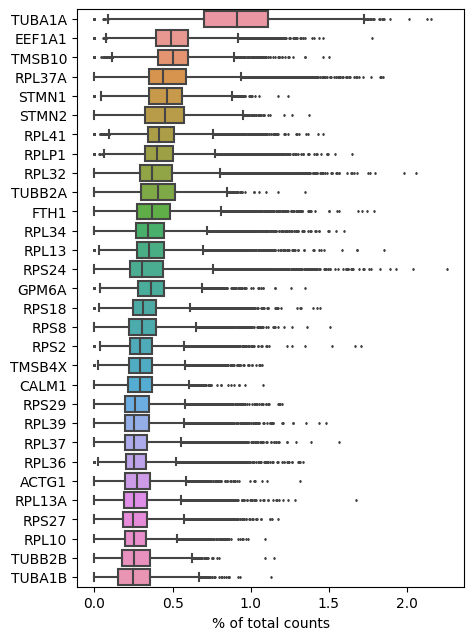

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 19571 × 25080
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors'
    obsm: 'spatial'
13


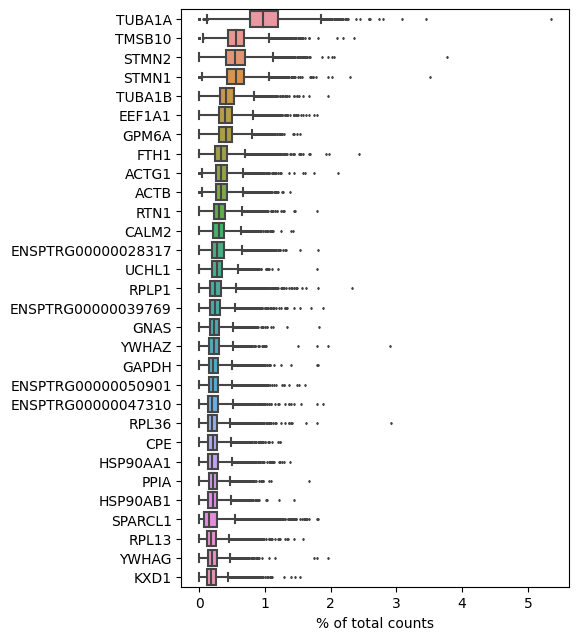

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 13530 × 21591
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'hb', 'ribo'
    uns: 'label_colors', 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial'
    obsm: 'spatial'
0


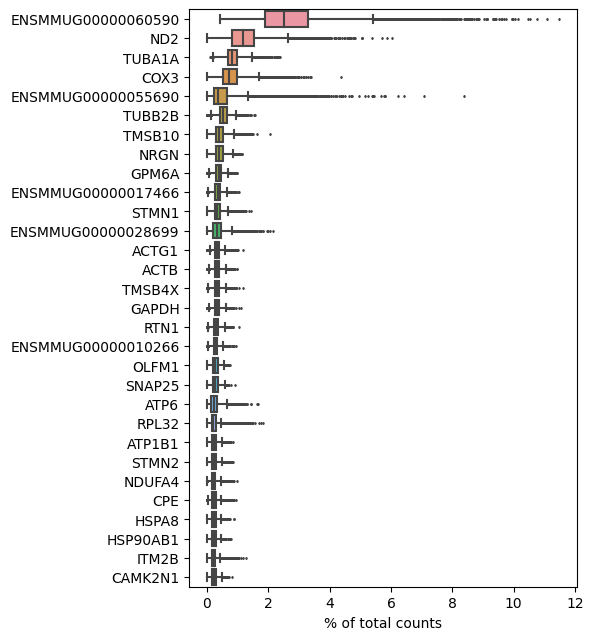

In [6]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  tmp = sc.read_h5ad(dir_path + j)
  print(tmp)
  remove = tmp.var_names.str.startswith('MT-')
  keep = np.invert(remove)
  print(sum(remove))
  tmp = tmp[:,keep]
  sc.pl.highest_expr_genes(tmp, n_top=30, )

Identify highly-variable genes.

normalizing counts per cell


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


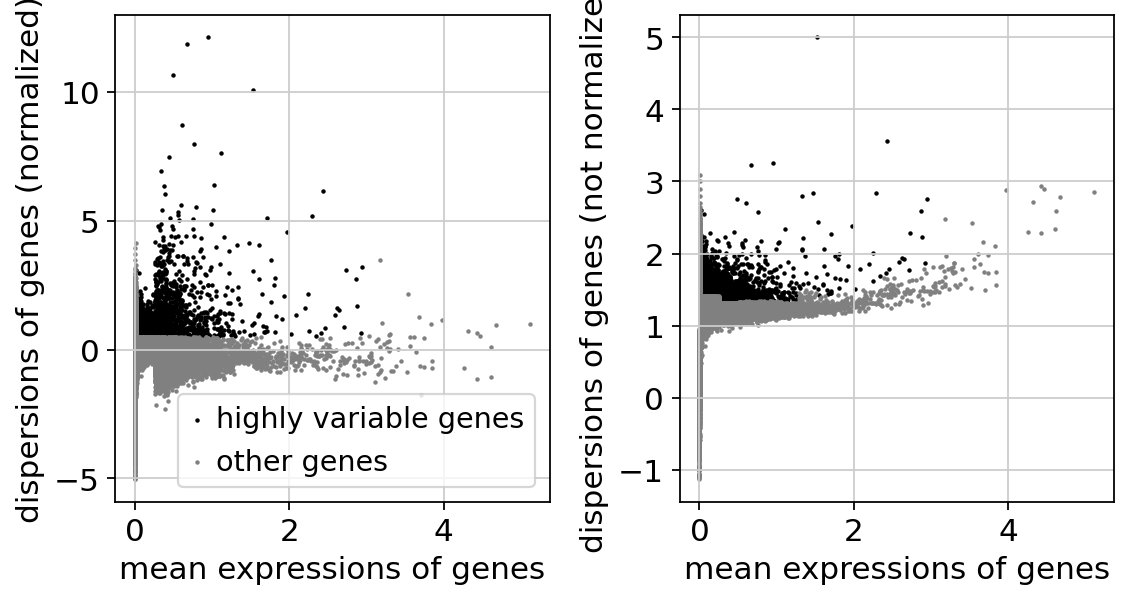

normalizing counts per cell


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


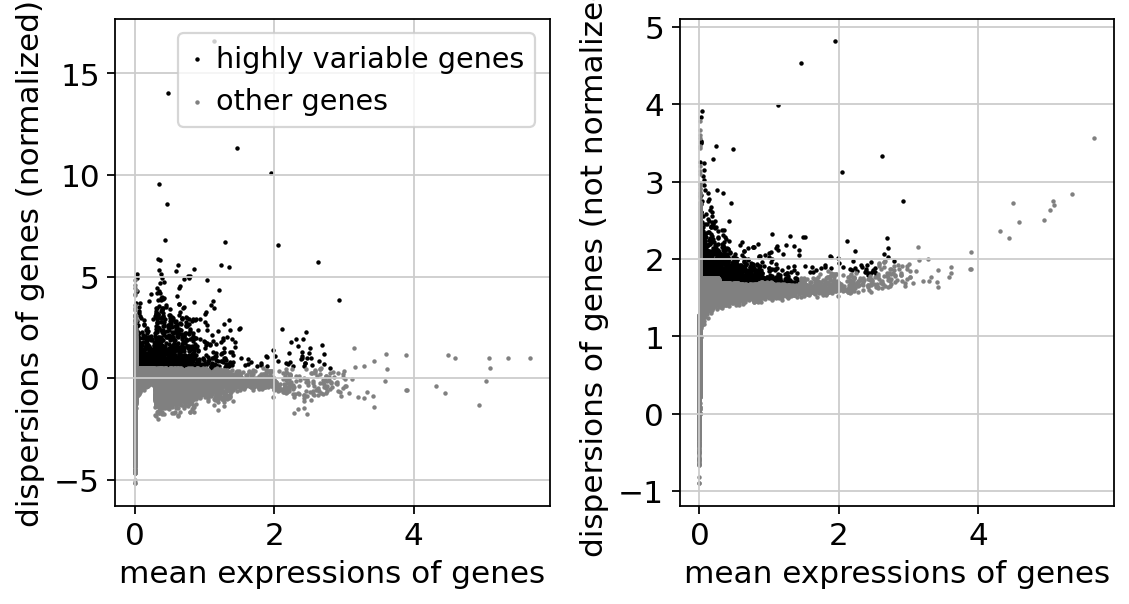

normalizing counts per cell


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


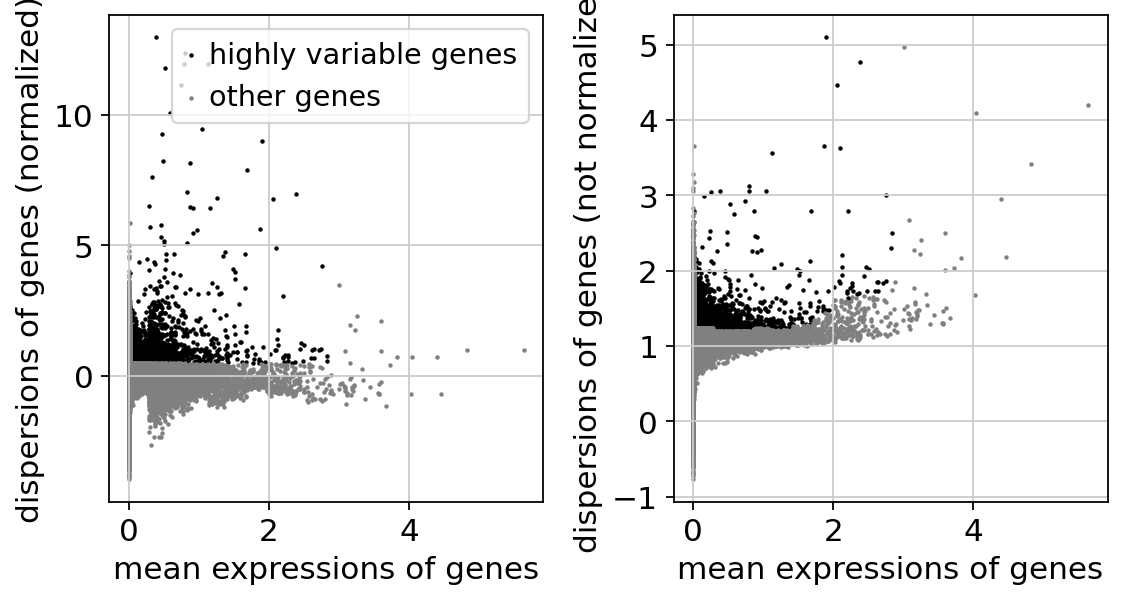

In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  adata = sc.read_h5ad(dir_path + j)
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
  sc.pl.highly_variable_genes(adata)

PCA analysis

computing PCA
    with n_comps=50


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:45)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


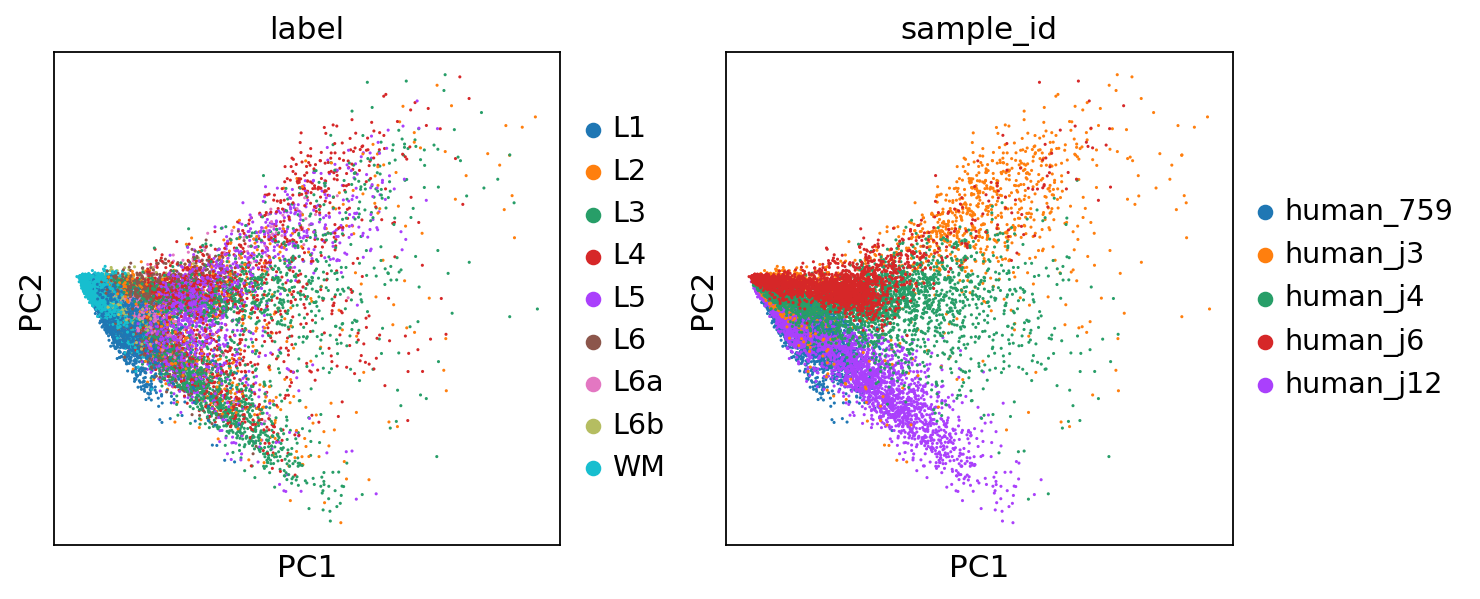

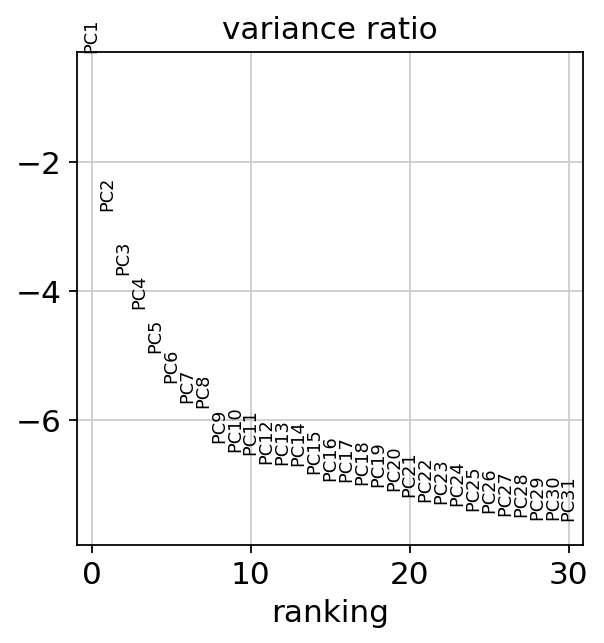

computing PCA
    with n_comps=50


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:50)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


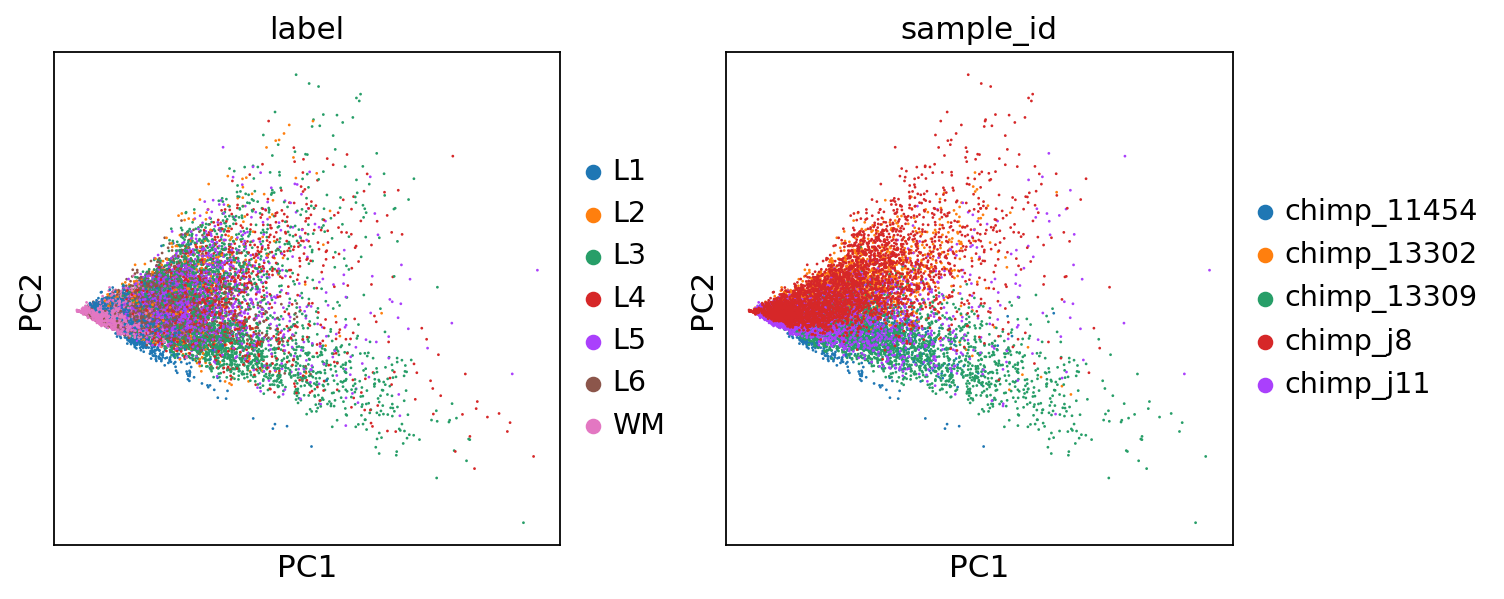

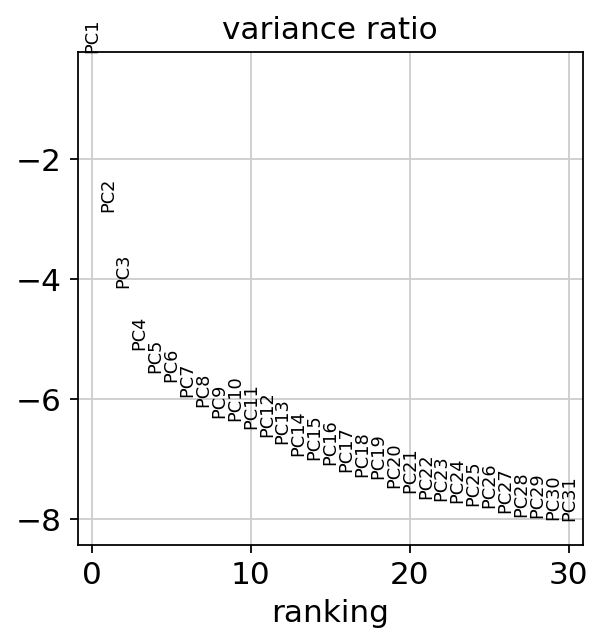

computing PCA
    with n_comps=50


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:39)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


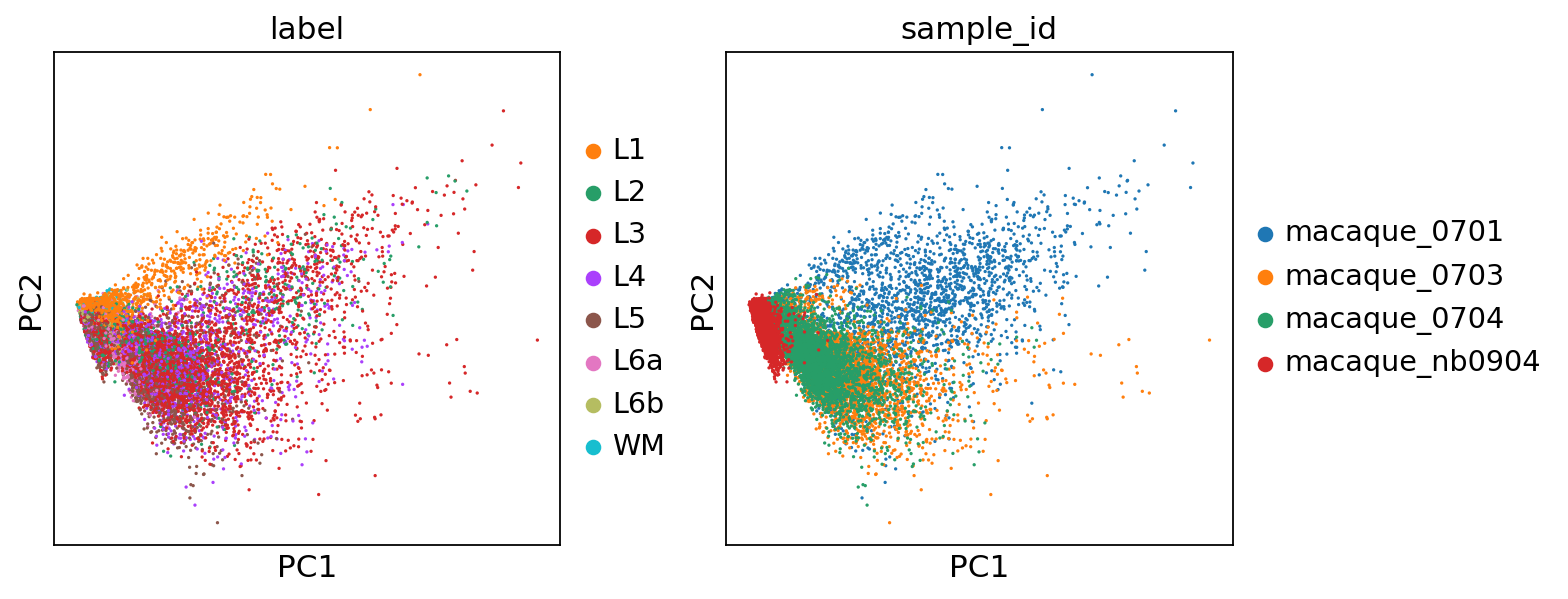

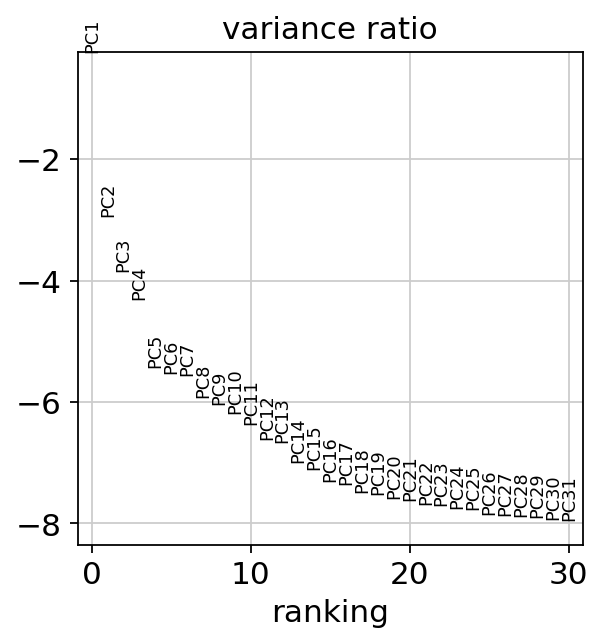

In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  adata = sc.read_h5ad(dir_path + j)
  sc.tl.pca(adata, svd_solver='arpack')
  sc.pl.pca(adata, color=['label','sample_id'])
  sc.pl.pca_variance_ratio(adata, log=True)

After normalized PCA

In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  adata = sc.read_h5ad(dir_path + j)
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)
  sc.tl.pca(adata, svd_solver='arpack')
  sc.pl.pca(adata, color=['label','sample_id'])
  sc.pl.pca_variance_ratio(adata, log=True)

Output hidden; open in https://colab.research.google.com to view.

Normalization, HVG & PCA

In [ ]:
pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.5 MB/s eta 0:00:00


In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  adata = sc.read_h5ad(dir_path + j)
  adata.obs["layer"]=adata.obs.label
  adata.obs.layer.replace({"L6a":"L6","L6b":"L6"},inplace=True)
  sc.pp.normalize_total(adata, target_sum=1e4)
  sc.pp.log1p(adata)
  remove = adata.var_names.str.startswith('MT-')
  keep = np.invert(remove)
  print(sum(remove))
  adata = adata[:,keep]
  sc.tl.pca(adata)
  sc.tl.rank_genes_groups(adata, 'layer', method='t-test')
  sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
  sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, groupby="layer",show_gene_labels=True)
  sc.tl.rank_genes_groups(adata, 'layer', method='wilcoxon')
  sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
  sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, groupby="layer",show_gene_labels=True)

Output hidden; open in https://colab.research.google.com to view.

Normailzed

>by mean value of all layer per sample mean value

In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
obj_list=[]
for j in spe:
  tmp = sc.read_h5ad(dir_path + j)
  lab = j.split(".")[0]
  print(lab)
  tmp.obs["spe"]=lab
  tmp.obs["layer"]=tmp.obs.label
  tmp.obs.layer.replace({'L6a': 'L6', 'L6b': 'L6'}, inplace=True)
  obj_list.append(tmp)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


human


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


chimp
macaque


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
primate=sc.concat(obj_list,merge="same",uns_merge="unique")
primate

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 48518 × 15585
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'spe', 'layer'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors', 'label_colors'
    obsm: 'spatial'

In [ ]:
  # library_size
  primate.obs["log_lib_size"] = np.log(primate.obs["total_counts"])
  # call layer-level analysis gene
  primate = primate[:, lg]

In [ ]:
# log-transform expression
sc.pp.normalize_total(primate, target_sum=1e4)
sc.pp.log1p(primate)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
#primate.obs.drop(['in_tissue', 'array_row', 'array_col', 'label', 'n_genes_by_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo'],axis=1,inplace=True)
#primate.var.drop(['feature_types', 'mt', 'hb', 'ribo'],axis=1,inplace=True)
primate

AnnData object with n_obs × n_vars = 48518 × 9208
    obs: 'sample_id', 'total_counts', 'spe', 'layer', 'log_lib_size'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors', 'log1p'
    obsm: 'spatial'

In [ ]:
del primate.uns['upper_part_L1_colors']
#del primate.obsm['spatial']

In [ ]:
primate

AnnData object with n_obs × n_vars = 48518 × 9208
    obs: 'sample_id', 'total_counts', 'spe', 'layer', 'log_lib_size'
    uns: 'log1p', 'pca', 'layer_colors', 'sample_id_colors', 'spe_colors'
    obsm: 'X_pca'
    varm: 'PCs'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


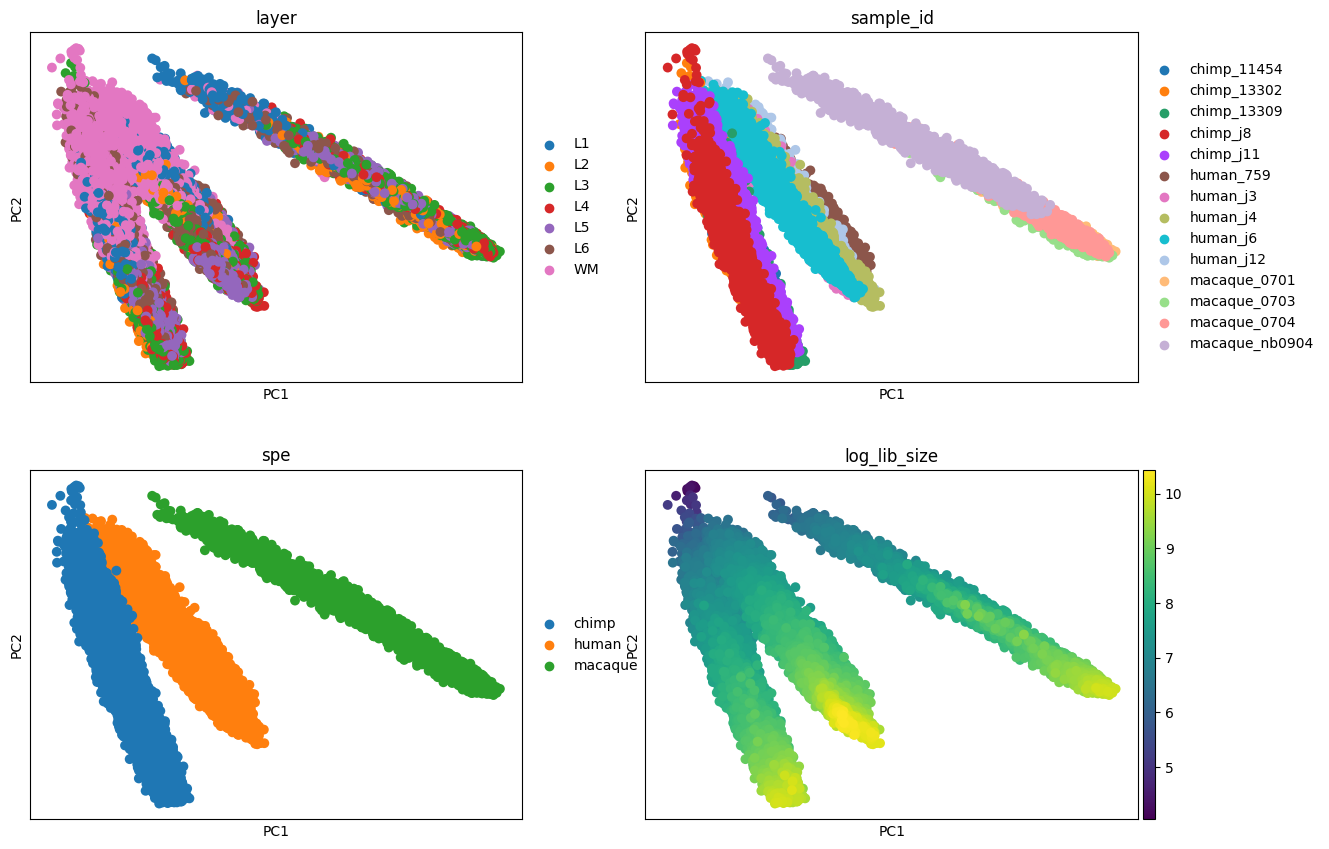

In [ ]:
sc.pp.pca(primate)
sc.pl.pca(primate, color=['layer', 'sample_id', 'spe','log_lib_size'], size=200, ncols=2)

In [ ]:
# normalized by mean
mean_value=[]
mean_value_df=[]
for j in np.unique(pri.obs.spe.values):
  print(j)
  for i in np.unique(pri[pri.obs.spe == j].obs.sample_id.values):
    print(i)
    for k in np.unique(pri[(pri.obs.spe == j) & (pri.obs.sample_id == i)].obs.layer.values):
      print(k)
      mean_value.append(pri[(pri.obs.spe == j) & (pri.obs.sample_id == i) & (pri.obs.layer == k)].X.mean(axis=0))
      mean_value_df=pd.DataFrame(np.concatenate(mean_value),columns=pri[(pri.obs.spe == j) & (pri.obs.sample_id == i) & (pri.obs.layer == k)].var_names)
    #print(mean_value_df)
    all_mean=mean_value_df.mean(axis=0).to_numpy()
    #print(all_mean)
    from scipy.sparse import csr_matrix
    pri[(pri.obs.spe == j) & (pri.obs.sample_id == i)].X=csr_matrix(pri[(pri.obs.spe == j) & (pri.obs.sample_id == i)].X-all_mean)
pri.write_h5ad(f"/content/drive/MyDrive/temp_project/normalized/primate_spot_all_nor.h5ad")

chimp
chimp_11454
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


chimp_13309
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


chimp_j11
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


chimp_j8
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


human
human_759
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


human_j12
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


human_j3
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


human_j4
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


human_j6
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


macaque
macaque_0701
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


macaque_0703
L1
L2
L3
L4
L5
L6
WM


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


by zscore value of all layer per sample zscore value

In [ ]:
def z_score(adata):
    pb_df = pd.DataFrame(adata.X.toarray(), columns=adata.var_names, index=adata.obs_names)
    pb_df['sample_id'] = adata.obs['sample_id']
    pb_df.head()
    # calculate statistics
    sample_mean = pb_df.groupby('sample_id').mean()
    sample_std = pb_df.groupby('sample_id').std()
    # calculate z-score
    columns = pb_df.columns.tolist()[:-1]
    for sample in tqdm(sample_mean.index.tolist()):
        pb_df.loc[pb_df.sample_id == sample, columns] = ((pb_df.loc[pb_df.sample_id == sample, columns] - sample_mean.loc[sample])
                                                         / sample_std.loc[sample]).fillna(0)
    # write adata
    adata.X = pb_df[columns].values
    return adata

In [ ]:
spe=["human.h5ad","chimp.h5ad","macaque.h5ad"]
for j in spe:
  tmp = sc.read_h5ad(dir_path + j)
  lab = j.split(".")[0]
  print(lab)
  tmp.obs["spe"]=lab
  tmp.obs["layer"]=tmp.obs.label
  tmp.obs.layer.replace({'L6a': 'L6', 'L6b': 'L6'}, inplace=True)
  # library_size
  tmp.obs["lib_size"] = tmp.X.sum(axis=1)
  tmp.obs["log_lib_size"] = np.log(tmp.obs["lib_size"])
  # call layer-level analysis gene
  tmp = tmp[:, lg]
  # log-transform expression
  sc.pp.normalize_total(tmp, target_sum=1e4)
  sc.pp.log1p(tmp)
  # normalized by mean
  tmp_nor=z_score(tmp)
  tmp.write_h5ad(f"/content/drive/MyDrive/temp_project/normalized/{lab}_spot_zscore_nor.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


human


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


chimp


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


macaque


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/4 [00:00<?, ?it/s]

concatenate(mean)

In [ ]:
hf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/human_spot_all_nor.h5ad")
cf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/chimp_spot_all_nor.h5ad")
mf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/macaque_spot_all_nor.h5ad")
spe=[hf,cf,mf]
primate=sc.concat(spe,merge='same',uns_merge='unique')
primate.write_h5ad('/content/drive/MyDrive/temp_project/normalized/primate_norm_spot_filt.h5ad')
primate

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


KeyboardInterrupt: ignored

concatenate(zscore)

In [ ]:
hf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/human_spot_zscore_nor.h5ad")
cf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/chimp_spot_zscore_nor.h5ad")
mf=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/macaque_spot_zscore_nor.h5ad")
spe=[hf,cf,mf]
primate=sc.concat(spe,merge='same',uns_merge='unique')
primate.write_h5ad('/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt.h5ad')
primate

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 48518 × 9208
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'spe', 'layer', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors', 'label_colors'
    obsm: 'spatial'

PCA

mean normalized

In [ ]:
primate=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/primate_norm_spot_filt.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


zscore normalized

In [ ]:
primate=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
primate

AnnData object with n_obs × n_vars = 48518 × 9208
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'spe', 'layer', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'label_colors', 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors', 'pca', 'layer_colors', 'sample_id_colors', 'spe_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


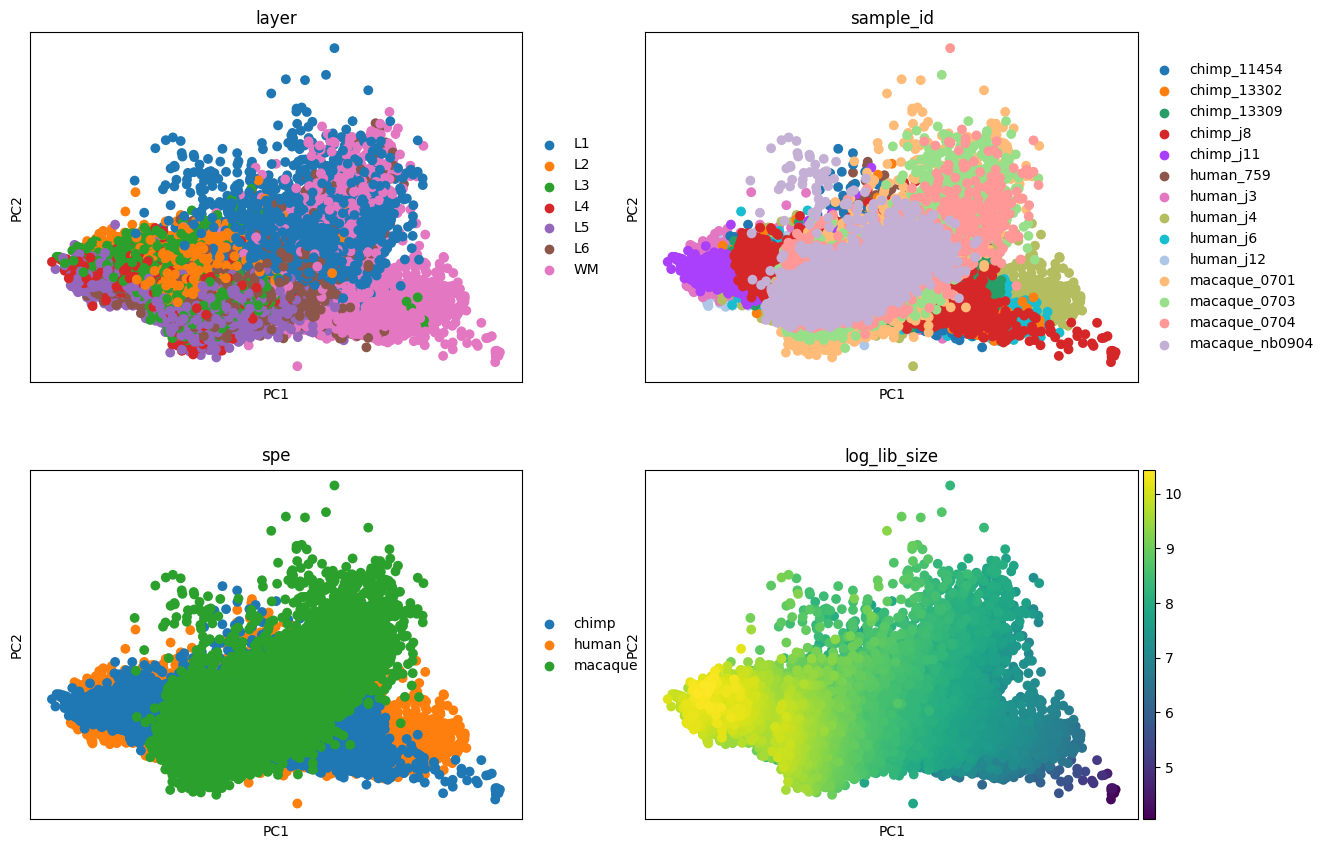

In [ ]:
sc.pp.pca(primate)
sc.pl.pca(primate, color=['layer', 'sample_id', 'spe','log_lib_size'], size=200, ncols=2,save="spot_nor_spe2_pca.pdf")

In [ ]:
primate.write_h5ad('/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt_PCA.h5ad')

Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels

In [ ]:
primate=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/primate_norm_spe2_filtered_PCA.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
df_list=[]
for i in ["human","chimp","macaque"]:
  for j in ["L1","L2","L3","L4","L5","L6","WM"]:
    tmp=primate[(primate.obs.spe==i) & (primate.obs.layer==j)]
    tmp_df=pd.DataFrame(tmp.X.toarray(), columns=tmp.var_names, index=tmp.obs.sample_id.astype(str)+"."+tmp.obs.layer.astype(str)+"."+tmp.obs_names)
    df_list.append(tmp_df)

In [ ]:
df=pd.concat(df_list)


In [ ]:
df.to_csv("/content/drive/MyDrive/temp_project/normalized/primate_norm_spe2_filtered_PCA_sort.csv")

NameError: ignored

In [ ]:
df

,NOC2L,HES4,AGRN,SDF4,B3GALT6,UBE2J2,SCNN1D,ACAP3,PUSL1,INTS11,...,SLC19A1,COL6A2,SPATC1L,LSS,MCM3AP,YBEY,PCNT,DIP2A,S100B,PRMT2
AAACATTTCCCGGATT-1,-0.301049,1.188551,1.264882,1.421772,-0.358720,-0.296881,-0.092287,1.379536,-0.073271,-0.285318,...,-0.111284,-0.140165,-0.265554,-0.208729,-0.195880,-0.101627,-0.142835,-0.233086,1.390558,-0.983977
AAACCTCATGAAGTTG-1,-0.301049,-0.646134,-0.569802,-0.412913,1.252641,-0.296881,-0.092287,-0.455149,-0.073271,-0.285318,...,-0.111284,-0.140165,-0.265554,1.402632,-0.195880,-0.101627,-0.142835,-0.233086,1.167235,-0.983977
AAACGAGACGGTTGAT-1,-0.301049,-0.646134,-0.569802,-0.412913,-0.358720,-0.296881,-0.092287,-0.455149,-0.073271,-0.285318,...,-0.111284,-0.140165,-0.265554,1.392756,-0.195880,-0.101627,-0.142835,-0.233086,-0.444126,-0.983977
AAACTAACGTGGCGAC-1,-0.301049,-0.646134,-0.569802,-0.412913,1.115877,-0.296881,-0.092287,-0.455149,-0.073271,-0.285318,...,-0.111284,1.334431,1.209042,-0.208729,-0.195880,-0.101627,-0.142835,-0.233086,1.030471,0.490619
AAAGGGCAGCTTGAAT-1,-0.301049,-0.646134,-0.569802,-0.412913,-0.358720,-0.296881,-0.092287,-0.455149,-0.073271,1.394561,...,1.568595,-0.140165,1.414325,-0.208729,-0.195880,1.578252,-0.142835,-0.233086,1.235753,1.291218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGTAAGCAGGATTGA-1,-0.310939,-0.071302,-1.051352,1.950583,-0.000681,-0.335722,0.000000,-0.723158,-0.048455,-0.374699,...,-0.044683,-0.128534,-0.154198,-0.148473,-0.159077,-0.070138,-0.009349,-0.056528,1.451398,-1.221632
TGGTCGTGCAAGGCAA-1,-0.310939,-0.071302,1.642809,1.953151,-0.000681,-0.335722,0.000000,-0.723158,-0.048455,-0.374699,...,-0.044683,-0.128534,-0.154198,-0.148473,-0.159077,-0.070138,-0.009349,-0.056528,1.453967,1.472529
TTATCTGACATTAGGA-1,-0.310939,-0.071302,-1.051352,-0.741010,-0.000681,-0.335722,0.000000,-0.723158,-0.048455,-0.374699,...,-0.044683,-0.128534,-0.154198,-0.148473,-0.159077,-0.070138,-0.009349,-0.056528,0.959166,-1.221632
TTCCCGGCGCCAATAG-1,-0.310939,-0.071302,-1.051352,-0.741010,-0.000681,-0.335722,0.000000,-0.723158,-0.048455,-0.374699,...,-0.044683,-0.128534,-0.154198,-0.148473,-0.159077,-0.070138,-0.009349,-0.056528,-1.240195,-1.221632


In [ ]:
primate=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt_PCA.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
df_list=[]
for i in ["human","chimp","macaque"]:
  for j in ["L1","L2","L3","L4","L5","L6","WM"]:
    tmp=primate[(primate.obs.spe==i) & (primate.obs.layer==j)]
    tmp_df=pd.DataFrame(tmp.X.toarray(), columns=tmp.var_names, index=tmp.obs.sample_id.astype(str)+"."+tmp.obs.layer.astype(str)+"."+tmp.obs_names)
    df_list.append(tmp_df)

In [ ]:
df=pd.concat(df_list)

In [ ]:
df

,NOC2L,HES4,AGRN,SDF4,B3GALT6,UBE2J2,SCNN1D,ACAP3,PUSL1,INTS11,...,SLC19A1,COL6A2,SPATC1L,LSS,MCM3AP,YBEY,PCNT,DIP2A,S100B,PRMT2
human_759.L1.AAACATTTCCCGGATT-1,-0.416663,1.487169,1.666167,2.457049,-0.535342,-0.430745,-0.206395,2.255953,-0.252497,-0.415055,...,-0.273927,-0.311556,-0.374865,-0.434642,-0.351251,-0.194690,-0.280883,-0.302336,1.340462,-0.891170
human_759.L1.AAACCTCATGAAGTTG-1,-0.416663,-0.777168,-0.723493,-0.506656,1.959112,-0.430745,-0.206395,-0.545030,-0.252497,-0.415055,...,-0.273927,-0.311556,-0.374865,2.452306,-0.351251,-0.194690,-0.280883,-0.302336,1.081353,-0.891170
human_759.L1.AAACGAGACGGTTGAT-1,-0.416663,-0.777168,-0.723493,-0.506656,-0.535342,-0.430745,-0.206395,-0.545030,-0.252497,-0.415055,...,-0.273927,-0.311556,-0.374865,2.434613,-0.351251,-0.194690,-0.280883,-0.302336,-0.788214,-0.891170
human_759.L1.AAACTAACGTGGCGAC-1,-0.416663,-0.777168,-0.723493,-0.506656,1.747396,-0.430745,-0.206395,-0.545030,-0.252497,-0.415055,...,-0.273927,3.104602,2.569129,-0.434642,-0.351251,-0.194690,-0.280883,-0.302336,0.922673,0.837079
human_759.L1.AAAGGGCAGCTTGAAT-1,-0.416663,-0.777168,-0.723493,-0.506656,-0.535342,-0.430745,-0.206395,-0.545030,-0.252497,2.675050,...,4.187604,-0.311556,2.978970,-0.434642,-0.351251,5.979514,-0.280883,-0.302336,1.160850,1.775391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
macaque_nb0904.WM.TGGTAAGCAGGATTGA-1,-0.341765,-0.137651,-0.676786,2.629451,-0.015972,-0.369033,0.000000,-0.446995,-0.116410,-0.399074,...,-0.138993,-0.325591,-0.252965,-0.208345,-0.207830,-0.167555,-0.052127,-0.062225,1.333464,-0.803118
macaque_nb0904.WM.TGGTCGTGCAAGGCAA-1,-0.341765,-0.137651,2.018452,2.632463,-0.015972,-0.369033,0.000000,-0.446995,-0.116410,-0.399074,...,-0.138993,-0.325591,-0.252965,-0.208345,-0.207830,-0.167555,-0.052127,-0.062225,1.335595,1.702119
macaque_nb0904.WM.TTATCTGACATTAGGA-1,-0.341765,-0.137651,-0.676786,-0.527600,-0.015972,-0.369033,0.000000,-0.446995,-0.116410,-0.399074,...,-0.138993,-0.325591,-0.252965,-0.208345,-0.207830,-0.167555,-0.052127,-0.062225,0.925002,-0.803118
macaque_nb0904.WM.TTCCCGGCGCCAATAG-1,-0.341765,-0.137651,-0.676786,-0.527600,-0.015972,-0.369033,0.000000,-0.446995,-0.116410,-0.399074,...,-0.138993,-0.325591,-0.252965,-0.208345,-0.207830,-0.167555,-0.052127,-0.062225,-0.900065,-0.803118


In [ ]:
df.to_csv("/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt_PCA.sort.csv")

In [ ]:
adata=sc.read_h5ad("/content/drive/MyDrive/temp_project/normalized/primate_norm_zscore_spot_filt_PCA.h5ad")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
  remove = adata.var_names.str.startswith('MT-')
  keep = np.invert(remove)
  print(sum(remove))
  adata = adata[:,keep]
  sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
  sc.tl.rank_genes_groups(adata, 'layer', method='t-test')
  sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
  sc.tl.rank_genes_groups(adata, 'layer', method='wilcoxon')
  sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

0


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
